In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('../linear_reg.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [7]:
df.sample()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
1689,14.65,670-674,2500.0,2500.0,36.0


In [8]:
df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [9]:
df[df['amount_funded_by_investors']<0]

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
400,12.29,685-689,7500.0,-0.01,36.0
1630,13.87,640-644,2200.0,-0.01,36.0


In [10]:
df[df['loan_length']==36]

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.00,36.0
1,12.12,715-719,19200.0,19200.00,36.0
3,9.99,695-699,10000.0,9975.00,36.0
4,11.71,695-699,12000.0,12000.00,36.0
5,15.31,670-674,6000.0,6000.00,36.0
...,...,...,...,...,...
2490,10.08,710-714,6400.0,6350.00,36.0
2492,14.65,685-689,24000.0,23975.00,36.0
2495,13.99,680-684,10000.0,10000.00,36.0
2496,12.42,675-679,6000.0,6000.00,36.0


array([[<Axes: xlabel='interest_rate', ylabel='interest_rate'>,
        <Axes: xlabel='amount_requested', ylabel='interest_rate'>,
        <Axes: xlabel='amount_funded_by_investors', ylabel='interest_rate'>,
        <Axes: xlabel='loan_length', ylabel='interest_rate'>],
       [<Axes: xlabel='interest_rate', ylabel='amount_requested'>,
        <Axes: xlabel='amount_requested', ylabel='amount_requested'>,
        <Axes: xlabel='amount_funded_by_investors', ylabel='amount_requested'>,
        <Axes: xlabel='loan_length', ylabel='amount_requested'>],
       [<Axes: xlabel='interest_rate', ylabel='amount_funded_by_investors'>,
        <Axes: xlabel='amount_requested', ylabel='amount_funded_by_investors'>,
        <Axes: xlabel='amount_funded_by_investors', ylabel='amount_funded_by_investors'>,
        <Axes: xlabel='loan_length', ylabel='amount_funded_by_investors'>],
       [<Axes: xlabel='interest_rate', ylabel='loan_length'>,
        <Axes: xlabel='amount_requested', ylabel='loan_length

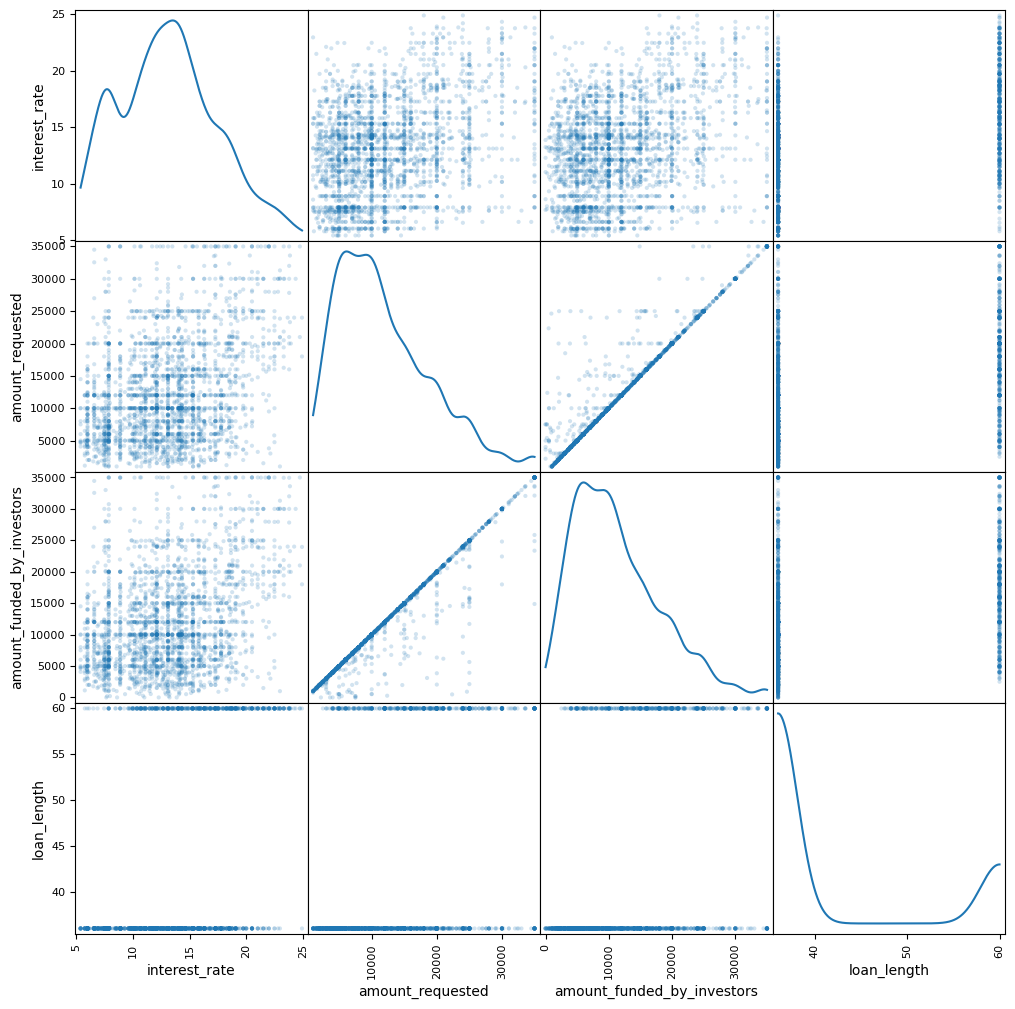

In [11]:
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal="kde")

In [12]:
df["fico_low"] = df["fico_range"].str.split("-").str[0].astype(int)
df["fico_high"] = df["fico_range"].str.split("-").str[1].astype(int)
df["fico_score"] = (df["fico_low"] + df["fico_high"]) / 2

df = df.drop(columns=["fico_range"])

In [13]:
def get_features(df):
    features = []
    for x in df.columns:  
        features.append(x)
    return features
features = get_features(df)
target = 'interest_rate'

In [14]:
df_no_int_rate = df.copy()
df_no_int_rate.drop(columns='interest_rate', inplace=True)
df_no_int_rate

,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,fico_score
0,20000.0,20000.00,36.0,735,739,737.0
1,19200.0,19200.00,36.0,715,719,717.0
2,35000.0,35000.00,60.0,690,694,692.0
3,10000.0,9975.00,36.0,695,699,697.0
4,12000.0,12000.00,36.0,695,699,697.0
...,...,...,...,...,...,...
2493,30000.0,29950.00,60.0,705,709,707.0
2494,16000.0,16000.00,60.0,740,744,742.0
2495,10000.0,10000.00,36.0,680,684,682.0
2496,6000.0,6000.00,36.0,675,679,677.0


In [15]:
df_fico_avg = df.copy()
df_fico_avg.drop(columns=['interest_rate', 'fico_high', 'fico_low'], inplace=True)
df_fico_avg

,amount_requested,amount_funded_by_investors,loan_length,fico_score
0,20000.0,20000.00,36.0,737.0
1,19200.0,19200.00,36.0,717.0
2,35000.0,35000.00,60.0,692.0
3,10000.0,9975.00,36.0,697.0
4,12000.0,12000.00,36.0,697.0
...,...,...,...,...
2493,30000.0,29950.00,60.0,707.0
2494,16000.0,16000.00,60.0,742.0
2495,10000.0,10000.00,36.0,682.0
2496,6000.0,6000.00,36.0,677.0


In [16]:
df_funded = df.copy()
df_funded.drop(columns=['fico_high', 'fico_low', 'interest_rate', 'amount_requested'], inplace=True)
df_funded

,amount_funded_by_investors,loan_length,fico_score
0,20000.00,36.0,737.0
1,19200.00,36.0,717.0
2,35000.00,60.0,692.0
3,9975.00,36.0,697.0
4,12000.00,36.0,697.0
...,...,...,...
2493,29950.00,60.0,707.0
2494,16000.00,60.0,742.0
2495,10000.00,36.0,682.0
2496,6000.00,36.0,677.0


In [17]:
df_requested = df.copy()
df_requested.drop(columns=['fico_high', 'fico_low','amount_requested', 'amount_funded_by_investors'], inplace=True)
df_requested

,interest_rate,loan_length,fico_score
0,8.90,36.0,737.0
1,12.12,36.0,717.0
2,21.98,60.0,692.0
3,9.99,36.0,697.0
4,11.71,36.0,697.0
...,...,...,...
2493,16.77,60.0,707.0
2494,14.09,60.0,742.0
2495,13.99,36.0,682.0
2496,12.42,36.0,677.0


In [18]:
X = df[features]
y = df['interest_rate']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [19]:
def lin_reg_score(df, features, target):
    for feature in features:
        X = df[[feature]]
        y = df[target]
        lin_mod = LinearRegression()
        lin_mod.fit(X, y)
        lin_mod.score(X, y)
        y_preds = lin_mod.predict(X)
        print(f'For X=df[[{feature}]], \n ---> r2 score: {r2_score(y , y_preds)}')
lin_reg_score(df, features, target)

For X=df[[interest_rate]], 
 ---> r2 score: 1.0
For X=df[[amount_requested]], 
 ---> r2 score: 0.1101119236174436
For X=df[[amount_funded_by_investors]], 
 ---> r2 score: 0.11345465116816866
For X=df[[loan_length]], 
 ---> r2 score: 0.17935713861265512
For X=df[[fico_low]], 
 ---> r2 score: 0.5029876752289809
For X=df[[fico_high]], 
 ---> r2 score: 0.5029876752289809
For X=df[[fico_score]], 
 ---> r2 score: 0.5029876752289809


In [20]:
X = df_fico_avg

X_train_sm = sm.add_constant(X)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1833.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:29:20   Log-Likelihood:                -5402.6
No. Observations:                2498   AIC:                         1.082e+04
Df Residuals:                    2493   BIC:                         1.084e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [21]:

scaler = MinMaxScaler()

columns = ["amount_funded_by_investors", "loan_length", "fico_score"]

df_funded[columns] = scaler.fit_transform(df_funded[columns])

df_funded.columns = columns

X = df_funded
y = df['interest_rate']

X_train_sm = sm.add_constant(X)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2433.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:29:20   Log-Likelihood:                -5407.3
No. Observations:                2498   AIC:                         1.082e+04
Df Residuals:                    2494   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [22]:
# for feature in features:
#     X = df[[feature]]
#     y = df['interest_rate']
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42)

#     lr = LinearRegression()
#     lr.fit(X_train, y_train)

#     y_pred = lr.predict(X_test)

# X_train_sm = sm.add_constant(X_train)

# ols_model = sm.OLS(y_train, X_train_sm).fit()

# print(ols_model.summary())

In [23]:
def residual_plot(ax, x, y, y_hat, n_bins=50):
    residuals = y - y_hat
    ax.axhline(0, color='black', linestyle='--')
    ax.scatter(y_hat, residuals, color='grey', alpha=0.5)
    ax.set_ylabel(r'Residuals ($y - \hat y$)')

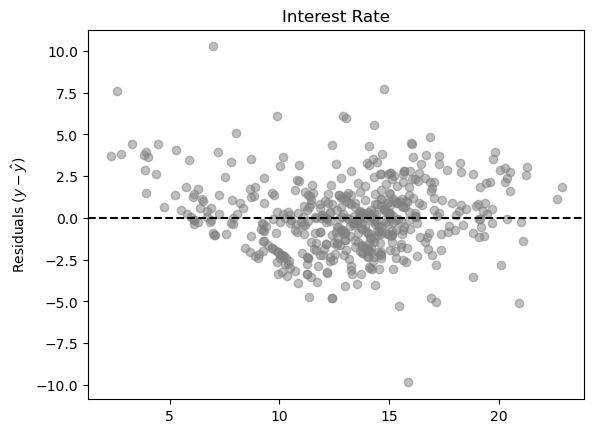

In [24]:
X = df_funded
y = df['interest_rate']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
residual_plot(ax, X_test, y_test, y_pred)
plt.title('Interest Rate');

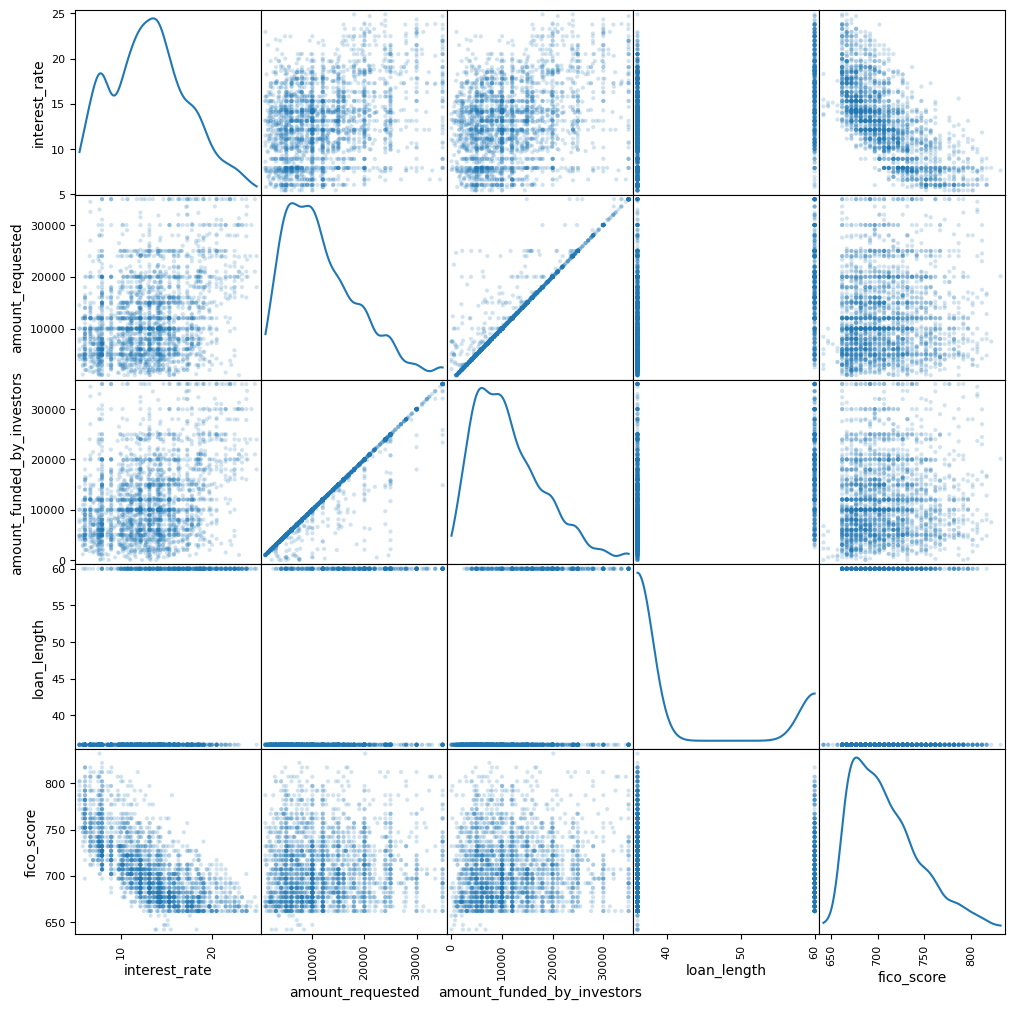

In [25]:
scatter_matrix(df[['interest_rate', 'amount_requested', 'amount_funded_by_investors', 'loan_length', 'fico_score']], alpha=0.2, figsize=(12, 12), diagonal="kde");

In [26]:
df[df['amount_requested']!=df['amount_funded_by_investors']]

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,fico_score
3,9.99,10000.0,9975.00,36.0,695,699,697.0
7,17.14,33500.0,33450.00,60.0,705,709,707.0
12,21.67,28000.0,27975.00,60.0,670,674,672.0
13,8.90,35000.0,34950.00,36.0,735,739,737.0
15,15.65,25000.0,24975.00,60.0,730,734,732.0
...,...,...,...,...,...,...,...
2483,10.75,25000.0,24950.00,36.0,765,769,767.0
2490,10.08,6400.0,6350.00,36.0,710,714,712.0
2492,14.65,24000.0,23975.00,36.0,685,689,687.0
2493,16.77,30000.0,29950.00,60.0,705,709,707.0


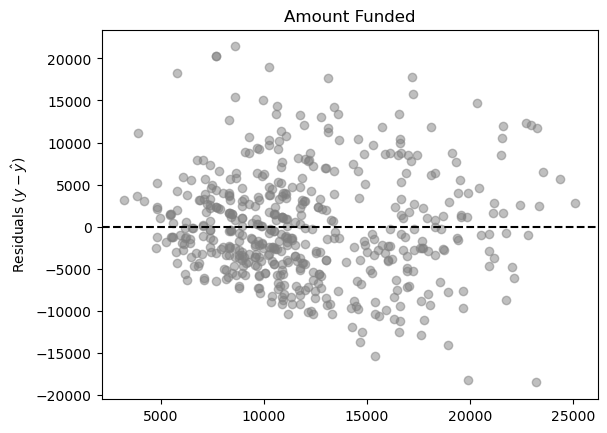

In [27]:
X = df_requested
y = df['amount_funded_by_investors']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
residual_plot(ax, X_test, y_test, y_pred)
plt.title('Amount Funded');

In [28]:
X = df_requested

X_train_sm = sm.add_constant(X)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())

                                OLS Regression Results                                
Dep. Variable:     amount_funded_by_investors   R-squared:                       0.318
Model:                                    OLS   Adj. R-squared:                  0.317
Method:                         Least Squares   F-statistic:                     387.3
Date:                        Mon, 24 Nov 2025   Prob (F-statistic):          1.63e-206
Time:                                17:29:22   Log-Likelihood:                -25435.
No. Observations:                        2498   AIC:                         5.088e+04
Df Residuals:                            2494   BIC:                         5.090e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [29]:
scaler = MinMaxScaler()

columns = ["interest_rate", "loan_length", "fico_score"]

df_requested[columns] = scaler.fit_transform(df_requested[columns])

df_requested.columns = columns

X_train_sm = sm.add_constant(df_requested)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())




                                OLS Regression Results                                
Dep. Variable:     amount_funded_by_investors   R-squared:                       0.318
Model:                                    OLS   Adj. R-squared:                  0.317
Method:                         Least Squares   F-statistic:                     387.3
Date:                        Mon, 24 Nov 2025   Prob (F-statistic):          1.63e-206
Time:                                17:29:22   Log-Likelihood:                -25435.
No. Observations:                        2498   AIC:                         5.088e+04
Df Residuals:                            2494   BIC:                         5.090e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

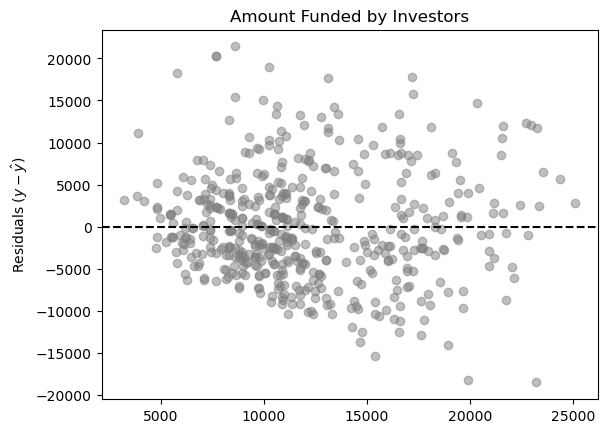

In [30]:
X = df_requested
y = df['amount_funded_by_investors']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
residual_plot(ax, X_test, y_test, y_pred)
plt.title('Amount Funded by Investors');

In [31]:
df_funded

,amount_funded_by_investors,loan_length,fico_score
0,0.571429,0.0,0.500000
1,0.548572,0.0,0.394737
2,1.000000,1.0,0.263158
3,0.285000,0.0,0.289474
4,0.342857,0.0,0.289474
...,...,...,...
2493,0.855714,1.0,0.342105
2494,0.457143,1.0,0.526316
2495,0.285714,0.0,0.210526
2496,0.171429,0.0,0.184211
